# Scratch Artificial Neural Network

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import sys
sys.dont_write_bytecode = True
sys.path.append('..')

# Import libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Import custom modules
from ArtificialNeuralNetwork import ArtificialNeuralNetwork
from Layer import Layer, OutputLayer, InputLayer
from Function import ActivationFunction, LossFunction
from enums import InitializerType, RegularizationType

# Pipeline for testing MNIST dataset

In [27]:
input_size = 784
hidden_layers = 5
hidden_size = 128
output_size = 10
learning_rate = 0.1
param_1 = 0
param_2 = 0.5
batch_size = 64


In [28]:
# Load MNIST dataset using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

In [29]:

model1 = ArtificialNeuralNetwork(
    123,
    InputLayer(input_size=input_size),
    Layer(
        weight_init=InitializerType.HE,
        bias_init=InitializerType.HE,
        input_size=input_size,
        num_neurons=128,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.prelu,
        alpha=0.2,
        layer_name=f"Hidden Layer 0",
    ),
    *[Layer(
        weight_init=InitializerType.HE,
        bias_init=InitializerType.HE,
        input_size=128,
        num_neurons=128,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.prelu,
        alpha=0.2,
        layer_name=f"Hidden Layer {_}",
    ) for _ in range(hidden_layers - 1)],
    OutputLayer(
        weight_init=InitializerType.HE,
        bias_init=InitializerType.HE,
        input_size=128,
        num_neurons=output_size,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.softmax,
        loss_funct=LossFunction.categorical_cross_entropy,
        layer_name="Output Layer"
    )
)


model2 = ArtificialNeuralNetwork(
    123,
    InputLayer(input_size=input_size),
    Layer(
        weight_init=InitializerType.HE,
        bias_init=InitializerType.HE,
        input_size=input_size,
        num_neurons=128,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.prelu,
        alpha=0.2,
        layer_name=f"Hidden Layer 0",
    ),
    *[Layer(
        weight_init=InitializerType.HE,
        bias_init=InitializerType.HE,
        input_size=128,
        num_neurons=128,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.prelu,
        alpha=0.2,
        layer_name=f"Hidden Layer {_}",
    ) for _ in range(hidden_layers - 1)],
    OutputLayer(
        weight_init=InitializerType.HE,
        bias_init=InitializerType.HE,
        input_size=128,
        num_neurons=output_size,
        param_1=param_1,
        param_2=param_2,
        activation=ActivationFunction.softmax,
        loss_funct=LossFunction.categorical_cross_entropy,
        layer_name="Output Layer"
    )
)





In [30]:


loss1 = model1.train(
    x=X_train,
    y=y_train,
    loss_function=LossFunction.categorical_cross_entropy,
    lr=0.01,
    epochs=20,
    batch_size=batch_size,
    verbose=True,
    validation_data=(X_test, y_test),
    useRMSProp=True,
)

loss2 = model2.train(
    x=X_train,
    y=y_train,
    loss_function=LossFunction.categorical_cross_entropy,
    lr=0.01,
    epochs=20,
    batch_size=batch_size,
    verbose=True,
    validation_data=(X_test, y_test),
)


Training: 100%|██████████| 20/20 [01:35<00:00,  4.75s/it, Loss: 12.3525, Val Loss: 12.3436]


Total training time: 88.30s


Training: 100%|██████████| 20/20 [01:26<00:00,  4.34s/it, Loss: 0.3500, Val Loss: 0.6197]

Total training time: 80.99s


In [31]:
from sklearn.metrics import f1_score


y_pred = model1.predict(X_test)
score = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score dengan RMS Prop: {score:.4f}")
y_pred = model2.predict(X_test)
score = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score tanpa RMS Prop: {score:.4f}")


F1 Score dengan RMS Prop: 0.0726
F1 Score tanpa RMS Prop: 0.9700


In [32]:
# from sklearn.metrics import f1_score

# print("\nF1 Scores for Activation Functions:")
# for name, model in activation_models.items():
#     y_pred = model.predict(X_test)
#     score = f1_score(y_test, y_pred, average='macro')
#     print(f"{name}: {score:.4f}")


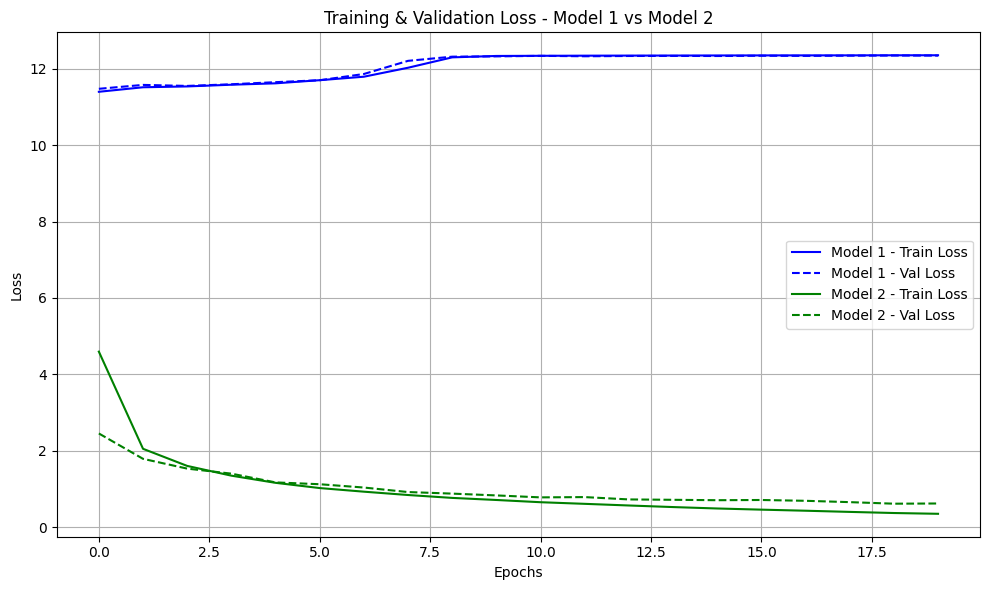

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

train_loss1, val_loss1 = loss1
train_loss2, val_loss2 = loss2

# Plot untuk model 1
plt.plot(train_loss1, label='Model 1 - Train Loss', color='blue')
plt.plot(val_loss1, linestyle='--', label='Model 1 - Val Loss', color='blue')

# Plot untuk model 2
plt.plot(train_loss2, label='Model 2 - Train Loss', color='green')
plt.plot(val_loss2, linestyle='--', label='Model 2 - Val Loss', color='green')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss - Model 1 vs Model 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


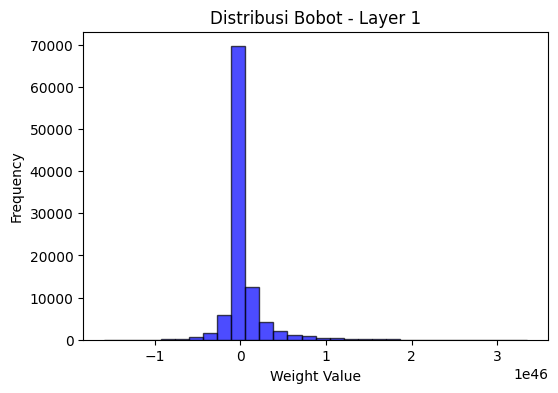

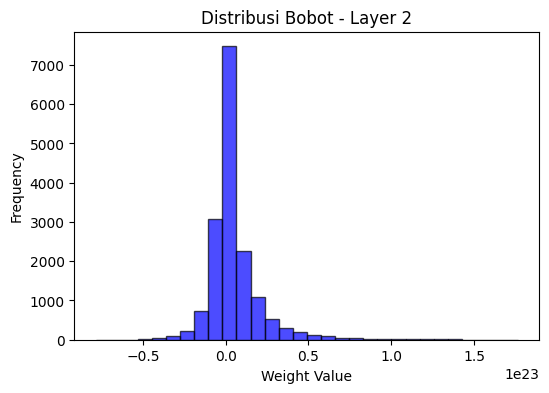

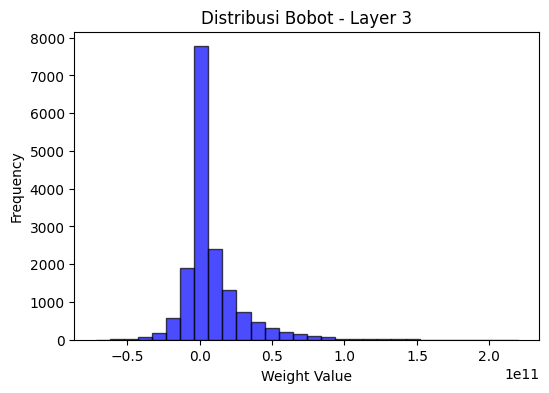

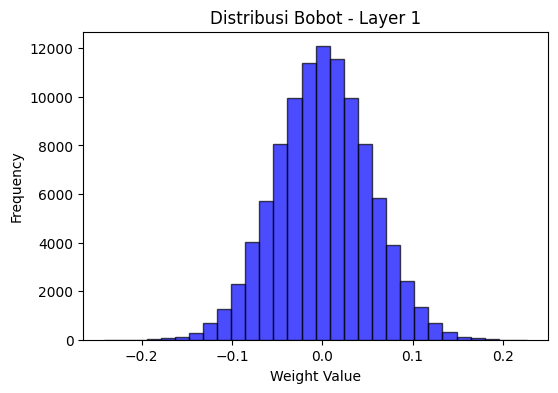

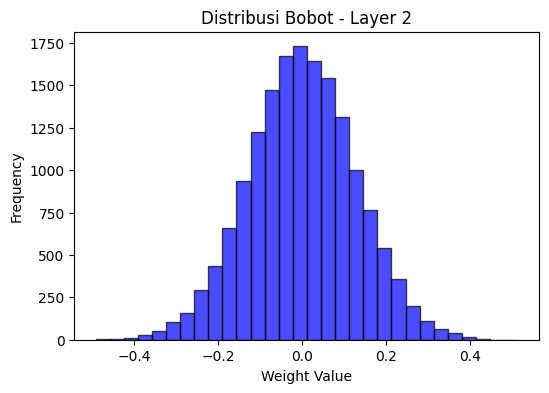

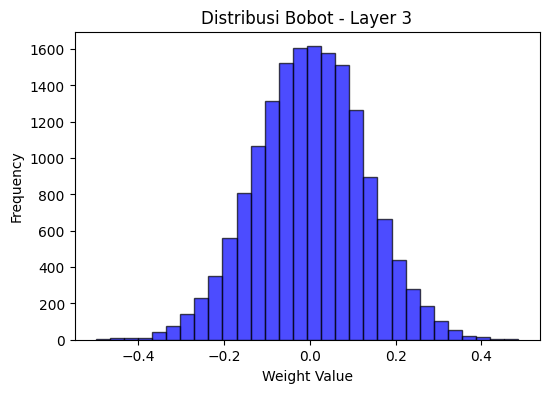

In [34]:
# ann_regularized.visualize_weight_distribution((1,2,3))

model1.visualize_weight_distribution((1, 2, 3))
model2.visualize_weight_distribution((1, 2, 3))




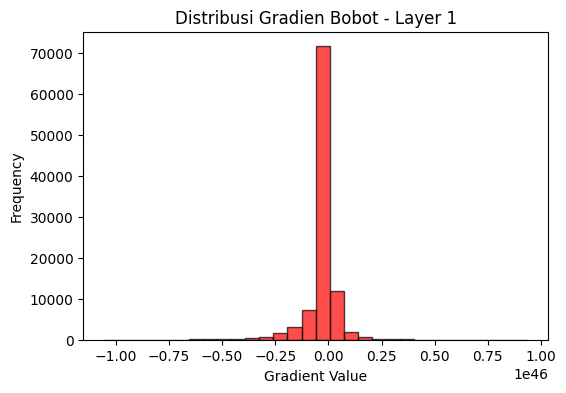

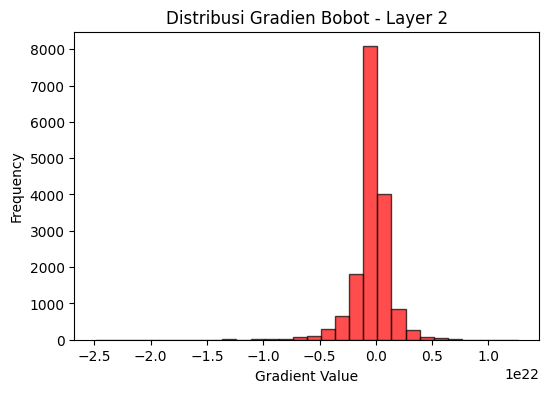

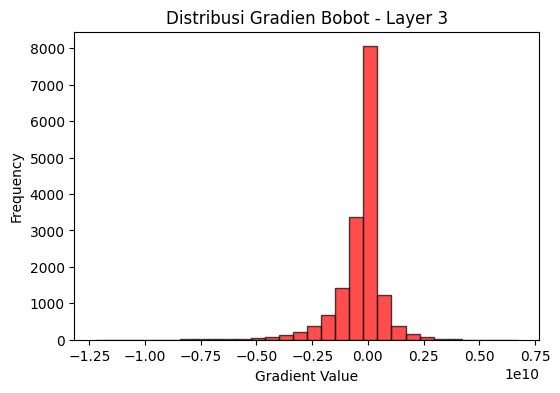

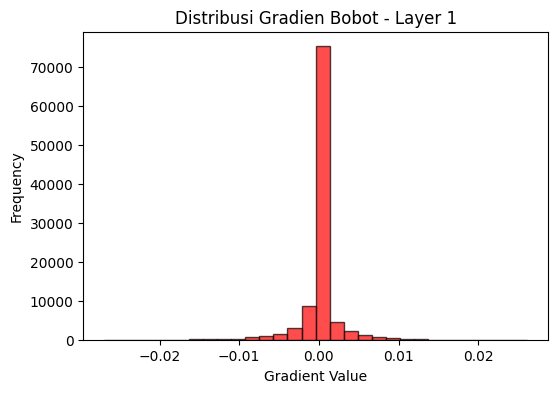

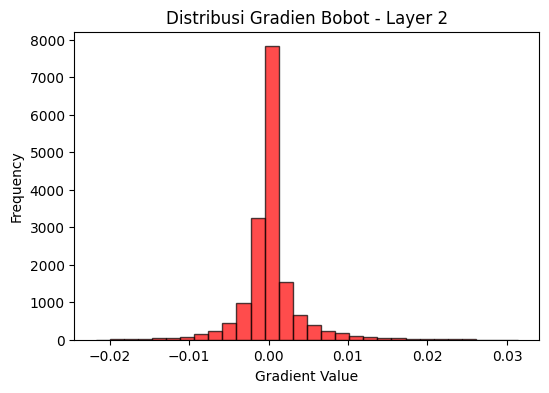

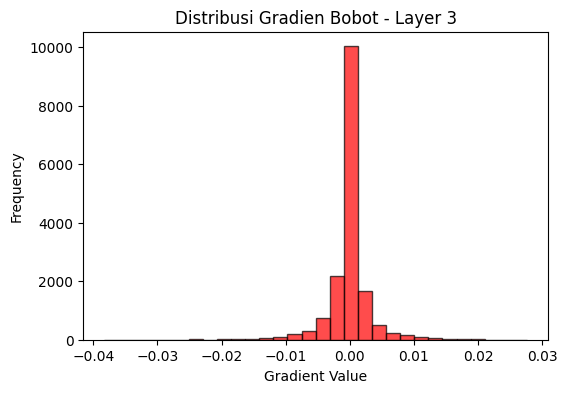

In [35]:

model1.visualize_gradient_distribution((1, 2, 3))
model2.visualize_gradient_distribution((1, 2, 3))



